### DO NOT RUN ANY CELLS ABOVE THE FOLLOWING SECTION:  Pickle the above pd.DataFrame

# Import Relevant Libraries

In [11]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load Tweet Data

In [2]:
tweets = []
for line in open('NintendoTweets.json', 'r'):
    if len(line)>1:
        tweets.append(json.loads(line))
tweets

[{'created_at': 'Tue Jun 12 16:00:24 +0000 2018',
  'id': 1006566899541598210,
  'id_str': '1006566899541598210',
  'text': 'IT BEGINS!! #NintendoDirect',
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 782300925155237889,
   'id_str': '782300925155237889',
   'name': 'Nicholas C.3!!! - SMASH BROS MANIA🏳️\u200d🌈',
   'screen_name': 'nickisonlinet',
   'location': '[Discord: Nicholas C.#3576]',
   'url': 'https://listography.com/nickisonlinet',
   'description': 'artist-shitposter • video game-animation/anime addict • bad at rhyming',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_count': 494,
   'friends_count': 1229,
   'listed_count': 4,
   'favourites_count': 63943,
   'statuses_count':

# Data Cleaning

 #### Flatten JSON File for embedded dictionaries

In [4]:
tweets_norm = json_normalize(tweets)

#### Condense dataframe to the relevant columns

In [5]:
df = tweets_norm[['user.id', 'text', 'lang', 'created_at', 'timestamp_ms']]
df.head()

user.id                                               text lang  \
0  7.823009e+17                        IT BEGINS!! #NintendoDirect   en   
1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   en   
2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   en   
3  3.192438e+08  RT @CelopanYT: VIENDO EL NINTENDO DIRECT CON V...   es   
4  3.632452e+08                          YO HERE WE GO #NintendoE3   en   

                       created_at   timestamp_ms  
0  Tue Jun 12 16:00:24 +0000 2018  1528819224616  
1  Tue Jun 12 16:00:24 +0000 2018  1528819224688  
2  Tue Jun 12 16:00:24 +0000 2018  1528819224632  
3  Tue Jun 12 16:00:24 +0000 2018  1528819224735  
4  Tue Jun 12 16:00:24 +0000 2018  1528819224782

#### Filter for English only

In [6]:
df = df.loc[df['lang'] == 'en']
print(len(df))
df.head()

71441


user.id                                               text lang  \
0  7.823009e+17                        IT BEGINS!! #NintendoDirect   en   
1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   en   
2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   en   
4  3.632452e+08                          YO HERE WE GO #NintendoE3   en   
5  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3   en   

                       created_at   timestamp_ms  
0  Tue Jun 12 16:00:24 +0000 2018  1528819224616  
1  Tue Jun 12 16:00:24 +0000 2018  1528819224688  
2  Tue Jun 12 16:00:24 +0000 2018  1528819224632  
4  Tue Jun 12 16:00:24 +0000 2018  1528819224782  
5  Tue Jun 12 16:00:24 +0000 2018  1528819224819

#### Create time column

In [7]:
# THIS IS NOT YET USED
# datetime.datetime.fromtimestamp(int('1528819224616')/1000)
# df['created_at'][0]

In [8]:
df['time'] = df['created_at'].apply(lambda x: str(x)[11:19])
print(len(df))
df.head()

#df['Seattle Zip'] = df['Test'].apply(lambda x: 0 if x == 0 else 1)

71441


user.id                                               text lang  \
0  7.823009e+17                        IT BEGINS!! #NintendoDirect   en   
1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   en   
2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   en   
4  3.632452e+08                          YO HERE WE GO #NintendoE3   en   
5  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3   en   

                       created_at   timestamp_ms      time  
0  Tue Jun 12 16:00:24 +0000 2018  1528819224616  16:00:24  
1  Tue Jun 12 16:00:24 +0000 2018  1528819224688  16:00:24  
2  Tue Jun 12 16:00:24 +0000 2018  1528819224632  16:00:24  
4  Tue Jun 12 16:00:24 +0000 2018  1528819224782  16:00:24  
5  Tue Jun 12 16:00:24 +0000 2018  1528819224819  16:00:24

#### Explore the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71441 entries, 0 to 104694
Data columns (total 6 columns):
user.id         71441 non-null float64
text            71441 non-null object
lang            71441 non-null object
created_at      71441 non-null object
timestamp_ms    71441 non-null object
time            71441 non-null object
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


In [10]:
df.isna().sum()

user.id         0
text            0
lang            0
created_at      0
timestamp_ms    0
time            0
dtype: int64

#### Min and max time stamps

In [11]:
print(df['time'].min())
print(df['time'].max())

16:00:24
17:00:23


#### Dropping duplicate rows

In [12]:
df = df.drop_duplicates(subset=None, keep='first')
print(len(df))
df.head()

71378


user.id                                               text lang  \
0  7.823009e+17                        IT BEGINS!! #NintendoDirect   en   
1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   en   
2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   en   
4  3.632452e+08                          YO HERE WE GO #NintendoE3   en   
5  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3   en   

                       created_at   timestamp_ms      time  
0  Tue Jun 12 16:00:24 +0000 2018  1528819224616  16:00:24  
1  Tue Jun 12 16:00:24 +0000 2018  1528819224688  16:00:24  
2  Tue Jun 12 16:00:24 +0000 2018  1528819224632  16:00:24  
4  Tue Jun 12 16:00:24 +0000 2018  1528819224782  16:00:24  
5  Tue Jun 12 16:00:24 +0000 2018  1528819224819  16:00:24

#### Remove hashtag words from text column

In [13]:
hashtags = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('#'):
            hashtags.append(i)
        else:
            pass

In [14]:
unique_hashtags = set(hashtags)
len(unique_hashtags)

1655

#### Remove links  from text column

In [15]:
links = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('http'):
            links.append(i)
        else:
            pass

In [16]:
unique_links = set(links)
len(unique_links)

8608

#### Remove @s from text column

In [17]:
ats = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('@'):
            ats.append(i)
        else:
            pass

In [18]:
unique_ats = set(ats)
len(unique_ats)

2502

#### All words to remove: hashtags, links, and @s

In [19]:
unique_hashtags = list(unique_hashtags)
unique_links = list(unique_links)
unique_ats = list(unique_ats)

words_to_remove_lists = [unique_hashtags] + [unique_links] + [unique_ats]

words_to_remove = []
for sublist in words_to_remove_lists:
    for i in sublist:
        words_to_remove.append(i)

#### Create a final list of tweets to use for NLP 
* Removes: hashtags, @s, and http

In [20]:
texts_final = []
for tweet in df['text']:
    words = tweet.split()
    resultwords = [i for i in words if i not in words_to_remove]
    result = ' '.join(resultwords)
    texts_final.append(result)
texts_final

['IT BEGINS!!',
 "RT lord forgive me but i'm back on my Smash 🅱️ros 🅱️ullshit",
 'The Nintendo presentation is starting!!! My body is ready.',
 'YO HERE WE GO',
 'HERE WE GO',
 "It's Go Time!",
 "I'm really hoping for a new Kid Icarus game at",
 'PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 Watch it live here: →https://t.co/wpAWBW8DW0',
 'HERE WE GO!',
 'It’s showtime!',
 "you're not allowed to finish without talking about THIS",
 'TIME TO EMBARK TO THE SUN!!!',
 "We're live.",
 'Time for Nintendo to beam excitement directly to your eyes!',
 'LETS GOOOO',
 'Alright Nintendo, let’s do this! In Reggie we trust',
 'MY BODY IS SO REGGIE!!!!',
 "RT It's almost time for Put your Switch down, pick up your computer or phone and head to to see e…",
 'Here we goooo!!!',
 'Who is going to be in Smash? Is there a new Animal Crossing? Are you a squid OR are you a kid? has…',
 'right now! Smash 5 predictions Crash Bandicoot King K. Rool Goku Isaac Champions…',
 'im ready to be disappointed',
 'Here goes

#### Pickled list due to long run time:

In [21]:
# import pickle

# with open('cleaned_tweets.pkl', 'wb') as f:
#     pickle.dump(text_no_hashtags, f)

In [22]:
# import pickle

# with open('cleaned_tweets.pkl', 'rb') as f:
#     texts_final = pickle.load(f)

#### Add this list to the dataframe

In [23]:
df['text2'] = texts_final
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                            IT BEGINS!!   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2         RT lord forgive me but i'm back on my Smash 🅱️...   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2         The Nintendo presentation is starting!!! My bo...   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                          YO HERE WE GO   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                     HERE WE GO   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                          It's Go Time!   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2            I'm really hoping for a new Kid Icarus game at   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 Watch...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

#### Remove punctuation

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def strip_punctuation(tweet):
    return ''.join(c for c in tweet if c not in string.punctuation)

punctuation_free = []
for tweet in df['text2']:
    punctuation_free.append(strip_punctuation(tweet))

In [26]:
df['text2'] = punctuation_free
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                              IT BEGINS   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2         RT lord forgive me but im back on my Smash 🅱️r...   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2         The Nintendo presentation is starting My body ...   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                          YO HERE WE GO   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                     HERE WE GO   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                            Its Go Time   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2             Im really hoping for a new Kid Icarus game at   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         PokemonGoNews RT NinSwitchNews 「🔴LIVE」 Watch i...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

#### Make text lower case

In [27]:
lower_case = []
for tweet in df['text2']:
    lower_case.append(tweet.lower())
lower_case

['it begins',
 'rt lord forgive me but im back on my smash 🅱️ros 🅱️ullshit',
 'the nintendo presentation is starting my body is ready',
 'yo here we go',
 'here we go',
 'its go time',
 'im really hoping for a new kid icarus game at',
 'pokemongonews rt ninswitchnews 「🔴live」 watch it live here →httpstcowpawbw8dw0',
 'here we go',
 'it’s showtime',
 'youre not allowed to finish without talking about this',
 'time to embark to the sun',
 'were live',
 'time for nintendo to beam excitement directly to your eyes',
 'lets goooo',
 'alright nintendo let’s do this in reggie we trust',
 'my body is so reggie',
 'rt its almost time for put your switch down pick up your computer or phone and head to to see e…',
 'here we goooo',
 'who is going to be in smash is there a new animal crossing are you a squid or are you a kid has…',
 'right now smash 5 predictions crash bandicoot king k rool goku isaac champions…',
 'im ready to be disappointed',
 'here goes nothing',
 'here we go',
 'rt read and sha

In [28]:
df['text2'] = lower_case
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                              it begins   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2         rt lord forgive me but im back on my smash 🅱️r...   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2         the nintendo presentation is starting my body ...   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                          yo here we go   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                     here we go   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                            its go time   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2             im really hoping for a new kid icarus game at   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         pokemongonews rt ninswitchnews 「🔴live」 watch i...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

#### Lemmatization

In [29]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatized_tweets = []
for tweet in df['text2']:
    lemmatized = [lemmatizer.lemmatize(tweet, get_wordnet_pos(tweet)) for tweet in nltk.word_tokenize(tweet)]
    combined_words = [' '.join(lemmatized)]
    lemmatized_tweets.append(combined_words)
lemmatized_tweets

lemmatized_tweets_final = [''.join(x) for x in lemmatized_tweets]
lemmatized_tweets_final

['it begin',
 'rt lord forgive me but im back on my smash 🅱️ros 🅱️ullshit',
 'the nintendo presentation be start my body be ready',
 'yo here we go',
 'here we go',
 'it go time',
 'im really hop for a new kid icarus game at',
 'pokemongonews rt ninswitchnews 「🔴live」 watch it live here →httpstcowpawbw8dw0',
 'here we go',
 'it ’ s showtime',
 'youre not allow to finish without talk about this',
 'time to embark to the sun',
 'be live',
 'time for nintendo to beam excitement directly to your eye',
 'let goooo',
 'alright nintendo let ’ s do this in reggie we trust',
 'my body be so reggie',
 'rt it almost time for put your switch down pick up your computer or phone and head to to see e…',
 'here we goooo',
 'who be go to be in smash be there a new animal cross be you a squid or be you a kid has…',
 'right now smash 5 prediction crash bandicoot king k rool goku isaac champions…',
 'im ready to be disappointed',
 'here go nothing',
 'here we go',
 'rt read and share the it illegal to use 

In [31]:
df['text2'] = lemmatized_tweets_final
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                               it begin   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2         rt lord forgive me but im back on my smash 🅱️r...   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2         the nintendo presentation be start my body be ...   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                          yo here we go   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                     here we go   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                             it go time   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2                im really hop for a new kid icarus game at   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         pokemongonews rt ninswitchnews 「🔴live」 watch i...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

#### Remove stop words / symbols

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
stop_word_free = []
for tweet in df['text2']:
    words = tweet.split()
    resultwords = [i for i in words if i not in stopwords.words('english')]
    result = ' '.join(resultwords)
    stop_word_free.append(result)
stop_word_free

['begin',
 'rt lord forgive im back smash 🅱️ros 🅱️ullshit',
 'nintendo presentation start body ready',
 'yo go',
 'go',
 'go time',
 'im really hop new kid icarus game',
 'pokemongonews rt ninswitchnews 「🔴live」 watch live →httpstcowpawbw8dw0',
 'go',
 '’ showtime',
 'youre allow finish without talk',
 'time embark sun',
 'live',
 'time nintendo beam excitement directly eye',
 'let goooo',
 'alright nintendo let ’ reggie trust',
 'body reggie',
 'rt almost time put switch pick computer phone head see e…',
 'goooo',
 'go smash new animal cross squid kid has…',
 'right smash 5 prediction crash bandicoot king k rool goku isaac champions…',
 'im ready disappointed',
 'go nothing',
 'go',
 'rt read share illegal use legal name',
 '',
 'begin last',
 'rt almost time put switch pick computer phone head see e…',
 'rt time',
 'ok body ready',
 'rt wan na know pokémon drop',
 'im conflict whether watch later ahhhhhh',
 'rt let',
 'body reggie let',
 'rt decide post nintendo e3 prediction picture 

In [34]:
df['text2'] = stop_word_free
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                                  begin   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2                    nintendo presentation start body ready   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                                  yo go   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                             go   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                                go time   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2                         im really hop new kid icarus game   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         pokemongonews rt ninswitchnews 「🔴live」 watch l...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

#### Remove http again

In [35]:
links2 = []
for text in df['text2']:
    words = text.split(' ')
    for i in words:
        if i.startswith('http'):
            links2.append(i)
        else:
            pass

In [36]:
unique_links2 = set(links2)
len(unique_links2)

135

In [37]:
texts_final_no_http = []
for tweet in df['text2']:
    words = tweet.split()
    resultwords = [i for i in words if i not in unique_links2]
    result = ' '.join(resultwords)
    texts_final_no_http.append(result)
texts_final_no_http

['begin',
 'rt lord forgive im back smash 🅱️ros 🅱️ullshit',
 'nintendo presentation start body ready',
 'yo go',
 'go',
 'go time',
 'im really hop new kid icarus game',
 'pokemongonews rt ninswitchnews 「🔴live」 watch live →httpstcowpawbw8dw0',
 'go',
 '’ showtime',
 'youre allow finish without talk',
 'time embark sun',
 'live',
 'time nintendo beam excitement directly eye',
 'let goooo',
 'alright nintendo let ’ reggie trust',
 'body reggie',
 'rt almost time put switch pick computer phone head see e…',
 'goooo',
 'go smash new animal cross squid kid has…',
 'right smash 5 prediction crash bandicoot king k rool goku isaac champions…',
 'im ready disappointed',
 'go nothing',
 'go',
 'rt read share illegal use legal name',
 '',
 'begin last',
 'rt almost time put switch pick computer phone head see e…',
 'rt time',
 'ok body ready',
 'rt wan na know pokémon drop',
 'im conflict whether watch later ahhhhhh',
 'rt let',
 'body reggie let',
 'rt decide post nintendo e3 prediction picture 

In [40]:
df['text2'] = texts_final_no_http
df.head(20).T

0   \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                                  begin   

                                                             1   \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   

                                                             2   \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2                    nintendo presentation start body ready   

                                          4   \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                                  yo go   

                                                  5   \
user.id                                  9.20286e+17   
text          HERE WE GO #NintendoDirect #NintendoE3   
lang                                              en   
created_at            Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                           1528819224819   
time                                        16:00:24   
text2                                             go   

                                          7   \
user.id                          1.06102e+09   
text               #NintendoE3 It's Go Time!   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224809   
time                                16:00:24   
text2                                go time   

                                                             9   \
user.id                                              3.0981e+08   
text          I'm really hoping for a new Kid Icarus game at...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225015   
time                                                   16:00:25   
text2                         im really hop new kid icarus game   

                                                             12  \
user.id                                             9.51451e+17   
text          PokemonGoNews: RT NinSwitchNews: 「🔴LIVE」 #Nint...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:25 +0000 2018   
timestamp_ms                                      1528819225122   
time                                                   16:00:25   
text2         pokemongonews rt ninswitchnews 「🔴live」 watch l...   

                                          14                              15  \
user.id                          3.00845e+09                      2.3004e+08   
text                 HERE WE GO! #NintendoE3      It’s showtime! #NintendoE3   
lang                                      en      

# Pickle the above cleaned pd.DataFrame

Create the Pickle

In [41]:
# import pickle

# with open('cleaned_twitter_df2.pkl', 'wb') as f:
#     pickle.dump(df, f)

Call the Pickle

In [1]:
import pickle

with open('cleaned_twitter_df2.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
df.head().T

0  \
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                                  begin   

                                                              1  \
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   

                                                              2  \
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2                    nintendo presentation start body ready   

                                           4  \
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                                  yo go   

                                                   5  
user.id                                  9.20286e+17  
text          HERE WE GO #NintendoDirect #NintendoE3  
lang                                              en  
created_at            Tue Jun 12 16:00:24 +0000 2018  
timestamp_ms                           1528819224819  
time                                        16:00:24  
text2                                             go

#### Reset Index For DF

In [3]:
df = df.reset_index()
df.head().T

0  \
index                                      0   
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                                  begin   

                                                              1  \
index                                                         1   
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   

                                                              2  \
index                                                         2   
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2                    nintendo presentation start body ready   

                                           3  \
index                                      4   
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                                  yo go   

                                                   4  
index                                              5  
user.id                                  9.20286e+17  
text          HERE WE GO #NintendoDirect #NintendoE3  
lang                                              en  
created_at            Tue Jun 12 16:00:24 +0000 2018  
timestamp_ms                           1528819224819  
time                                        16:00:24  
text2                                             go

# Create NLP DataFrame

#### Using Vader for NLP
### DO NOT RUN -- Pickled BELOW

In [9]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()
# vader_output = []
# for tweet in df['text']:
#     vader_output.append(analyzer.polarity_scores(tweet))
# vader_output

In [5]:
# len(vader_output)

71378

#### Pickle Vader Output

In [6]:
# import pickle

# with open('vader_output.pkl', 'wb') as f:
#     pickle.dump(vader_output, f)

In [7]:
import pickle

with open('vader_output.pkl', 'rb') as f:
    vader_output = pickle.load(f)

In [8]:
vader_output

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.1406},
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5229},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.4754},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.5411},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.68},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu'

#### Vader Output in DF

In [12]:
df_sentiment = json_normalize(vader_output)
df_sentiment.head()

compound  neg    neu    pos
0    0.0000  0.0  1.000  0.000
1    0.1406  0.0  0.900  0.100
2    0.5229  0.0  0.748  0.252
3    0.0000  0.0  1.000  0.000
4    0.0000  0.0  1.000  0.000

#### Append Vader to Original DF

In [13]:
df = pd.concat([df, df_sentiment], axis=1)
df.head().T

0  \
index                                      0   
user.id                          7.82301e+17   
text             IT BEGINS!! #NintendoDirect   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
time                                16:00:24   
text2                                  begin   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                              1  \
index                                                         1   
user.id                                             3.37268e+08   
text          RT @funkemcfly: lord forgive me but i'm back o...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
time                                                   16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   
compound                                                 0.1406   
neg                                                           0   
neu                                                         0.9   
pos                                                         0.1   

                                                              2  \
index                                                         2   
user.id                                             3.18781e+08   
text          The Nintendo presentation is starting!!! My bo...   
lang                                                         en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
time                                                   16:00:24   
text2                    nintendo presentation start body ready   
compound                                                 0.5229   
neg                                                           0   
neu                                                       0.748   
pos                                                       0.252   

                                           3  \
index                                      4   
user.id                          3.63245e+08   
text               YO HERE WE GO #NintendoE3   
lang                                      en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
time                                16:00:24   
text2                                  yo go   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                   4  
index                                              5  
user.id                                  9.20286e+17  
text          HERE WE GO #NintendoDirect #NintendoE3  
lang                                              en  
created_at            Tue Jun 12 16:00:24 +0000 2018  
timestamp_ms                           1528819224819  
time                                        16:00:24  
text2                                             go  
compound                                           0  
neg                                                0  
neu                                                1  
pos                                                0

# Adding Words to DF

#### Create Matrix Where:
* columns = words  
* rows = tweets

In [14]:
total_words = []
for i in df['text2']:
    words = i.split()
    for j in words:
        total_words.append(j)

unique_words = [] 
for i in total_words:
    if not i in unique_words:
        unique_words.append(i)
unique_words

['begin',
 'rt',
 'lord',
 'forgive',
 'im',
 'back',
 'smash',
 '🅱️ros',
 '🅱️ullshit',
 'nintendo',
 'presentation',
 'start',
 'body',
 'ready',
 'yo',
 'go',
 'time',
 'really',
 'hop',
 'new',
 'kid',
 'icarus',
 'game',
 'pokemongonews',
 'ninswitchnews',
 '「🔴live」',
 'watch',
 'live',
 '→httpstcowpawbw8dw0',
 '’',
 'showtime',
 'youre',
 'allow',
 'finish',
 'without',
 'talk',
 'embark',
 'sun',
 'beam',
 'excitement',
 'directly',
 'eye',
 'let',
 'goooo',
 'alright',
 'reggie',
 'trust',
 'almost',
 'put',
 'switch',
 'pick',
 'computer',
 'phone',
 'head',
 'see',
 'e…',
 'animal',
 'cross',
 'squid',
 'has…',
 'right',
 '5',
 'prediction',
 'crash',
 'bandicoot',
 'king',
 'k',
 'rool',
 'goku',
 'isaac',
 'champions…',
 'disappointed',
 'nothing',
 'read',
 'share',
 'illegal',
 'use',
 'legal',
 'name',
 'last',
 'ok',
 'wan',
 'na',
 'know',
 'pokémon',
 'drop',
 'conflict',
 'whether',
 'later',
 'ahhhhhh',
 'decide',
 'post',
 'e3',
 'picture',
 'form',
 'like',
 'appre

In [15]:
print(len(total_words))
print(len(unique_words))

468896
14518


In [16]:
vectorizer = CountVectorizer(vocabulary=unique_words)
vectorized_words = vectorizer.transform(df['text2'])

#### View the matrix:

In [17]:
print(vectorized_words.shape) # (tweet_count, unique_word_count)
word_array = vectorized_words.toarray()
word_array

(71378, 14518)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

#### Add matrix to a dataframe

In [18]:
#vectorized_words is a matrix (71378, 14653)
#unique_words is a list (14653)
#df.index has len of (71378)

matrix_df = pd.DataFrame(word_array, columns=unique_words, index=df.index) 
matrix_df.head() 

begin  rt  lord  forgive  im  back  smash  🅱️ros  🅱️ullshit  nintendo  \
0      1   0     0        0   0     0      0      0          0         0   
1      0   1     1        1   1     1      1      0          0         0   
2      0   0     0        0   0     0      0      0          0         1   
3      0   0     0        0   0     0      0      0          0         0   
4      0   0     0        0   0     0      0      0          0         0   

     ...      sov  255  finland  duuudess  ny  podcast  blease  yeeeeeeesssss  \
0    ...        0    0        0         0   0        0       0              0   
1    ...        0    0        0         0   0        0       0              0   
2    ...        0    0        0         0   0        0       0              0   
3    ...        0    0        0         0   0        0       0              0   
4    ...        0    0        0         0   0        0       0              0   

   embarass  freelance  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 14518 columns]

Rename columns in df (text, lang, time so that joining matrix has not conflicts

In [19]:
df = df.rename(index=str, columns={"text": ".text.", "lang": ".lang.", "time": ".time."})
df.head().T

0  \
index                                      0   
user.id                          7.82301e+17   
.text.           IT BEGINS!! #NintendoDirect   
.lang.                                    en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
.time.                              16:00:24   
text2                                  begin   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                              1  \
index                                                         1   
user.id                                             3.37268e+08   
.text.        RT @funkemcfly: lord forgive me but i'm back o...   
.lang.                                                       en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
.time.                                                 16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   
compound                                                 0.1406   
neg                                                           0   
neu                                                         0.9   
pos                                                         0.1   

                                                              2  \
index                                                         2   
user.id                                             3.18781e+08   
.text.        The Nintendo presentation is starting!!! My bo...   
.lang.                                                       en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
.time.                                                 16:00:24   
text2                    nintendo presentation start body ready   
compound                                                 0.5229   
neg                                                           0   
neu                                                       0.748   
pos                                                       0.252   

                                           3  \
index                                      4   
user.id                          3.63245e+08   
.text.             YO HERE WE GO #NintendoE3   
.lang.                                    en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
.time.                              16:00:24   
text2                                  yo go   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                   4  
index                                              5  
user.id                                  9.20286e+17  
.text.        HERE WE GO #NintendoDirect #NintendoE3  
.lang.                                            en  
created_at            Tue Jun 12 16:00:24 +0000 2018  
timestamp_ms                           1528819224819  
.time.                                      16:00:24  
text2                                             go  
compound                                           0  
neg                                                0  
neu                                                1  
pos                                                0

#### Combine Matrix DF and Original DF  
* Need to remove original index and add new index column in both DF and Matrix_DF

In [119]:
df = df.drop('index', 1)

user.id                                             .text. .lang.  \
0  7.823009e+17                        IT BEGINS!! #NintendoDirect     en   
1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...     en   
2  3.187814e+08  The Nintendo presentation is starting!!! My bo...     en   
3  3.632452e+08                          YO HERE WE GO #NintendoE3     en   
4  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3     en   

                       created_at   timestamp_ms    .time.  \
0  Tue Jun 12 16:00:24 +0000 2018  1528819224616  16:00:24   
1  Tue Jun 12 16:00:24 +0000 2018  1528819224688  16:00:24   
2  Tue Jun 12 16:00:24 +0000 2018  1528819224632  16:00:24   
3  Tue Jun 12 16:00:24 +0000 2018  1528819224782  16:00:24   
4  Tue Jun 12 16:00:24 +0000 2018  1528819224819  16:00:24   

                                           text2  compound  neg    neu    pos  \
0                                          begin    0.0000  0.0  1.000  0.000   
1  rt lord forgive im back smash 🅱️ros 🅱️ullshit    0.1406  0.0  0.900  0.100   
2         nintendo presentation start body ready    0.5229  0.0  0.748  0.252   
3                                          yo go    0.0000  0.0  1.000  0.000   
4                                             go    0.0000  0.0  1.000  0.000   

   five_seconds  
0             1  
1             1  
2             1  
3             1  
4             1

In [133]:
matrix_df = matrix_df.reset_index()
matrix_df = matrix_df.rename(index=str, columns={'index': 'matrix_df_index'})
matrix_df.head()

matrix_df_index  begin  rt  lord  forgive  im  back  smash  🅱️ros  \
0                0      1   0     0        0   0     0      0      0   
1                1      0   1     1        1   1     1      1      0   
2                2      0   0     0        0   0     0      0      0   
3                3      0   0     0        0   0     0      0      0   
4                4      0   0     0        0   0     0      0      0   

   🅱️ullshit    ...      sov  255  finland  duuudess  ny  podcast  blease  \
0          0    ...        0    0        0         0   0        0       0   
1          0    ...        0    0        0         0   0        0       0   
2          0    ...        0    0        0         0   0        0       0   
3          0    ...        0    0        0         0   0        0       0   
4          0    ...        0    0        0         0   0        0       0   

   yeeeeeeesssss  embarass  freelance  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  

[5 rows x 14519 columns]

In [134]:
df = df.reset_index()
df = df.rename(index=str, columns={'index': 'df_index'})
df.head()

df_index       user.id                                             .text.  \
0        0  7.823009e+17                        IT BEGINS!! #NintendoDirect   
1        1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   
2        2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   
3        3  3.632452e+08                          YO HERE WE GO #NintendoE3   
4        4  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3   

  .lang.                      created_at   timestamp_ms    .time.  \
0     en  Tue Jun 12 16:00:24 +0000 2018  1528819224616  16:00:24   
1     en  Tue Jun 12 16:00:24 +0000 2018  1528819224688  16:00:24   
2     en  Tue Jun 12 16:00:24 +0000 2018  1528819224632  16:00:24   
3     en  Tue Jun 12 16:00:24 +0000 2018  1528819224782  16:00:24   
4     en  Tue Jun 12 16:00:24 +0000 2018  1528819224819  16:00:24   

                                           text2  compound  neg    neu    pos  \
0                                          begin    0.0000  0.0  1.000  0.000   
1  rt lord forgive im back smash 🅱️ros 🅱️ullshit    0.1406  0.0  0.900  0.100   
2         nintendo presentation start body ready    0.5229  0.0  0.748  0.252   
3                                          yo go    0.0000  0.0  1.000  0.000   
4                                             go    0.0000  0.0  1.000  0.000   

   five_seconds  
0             1  
1             1  
2             1  
3             1  
4             1

In [135]:
df_words = df.join(matrix_df)
df_words.head().T

# print(len(matrix_df))
# print(len(df))

0  \
df_index                                      0   
user.id                             7.82301e+17   
.text.              IT BEGINS!! #NintendoDirect   
.lang.                                       en   
created_at       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                      1528819224616   
.time.                                 16:00:24   
text2                                     begin   
compound                                      0   
neg                                           0   
neu                                           1   
pos                                           0   
five_seconds                                  1   
matrix_df_index                               0   
begin                                         1   
rt                                            0   
lord                                          0   
forgive                                       0   
im                                            0   
back                                          0   
smash                                         0   
🅱️ros                                         0   
🅱️ullshit                                     0   
nintendo                                      0   
presentation                                  0   
start                                         0   
body                                          0   
ready                                         0   
yo                                            0   
go                                            0   
...                                         ...   
mastermind                                    0   
excatly                                       0   
tream                                         0   
07092018                                      0   
preach                                        0   
monsties                                      0   
heretic                                       0   
hum                                           0   
abao                                          0   
😂😭                                            0   
sowas                                         0   
replay                                        0   
fail…                                         0   
audacity                                      0   
banking                                       0   
boooooooo                                     0   
thin                                          0   
majestic                                      0   
comedic                                       0   
tomodachi                                     0   
sov                                           0   
255                                           0   
finland                                       0   
duuudess                                      0   
ny                                            0   
podcast                                       0   
blease                                        0   
yeeeeeeesssss                                 0   
embarass                                      0   
freelance                                     0   

                                                                 1  \
df_index                                                         1   
user.id                                                3.37268e+08   
.text.           RT @funkemcfly: lord forgive me but i'm back o...   
.lang.                                                          en   
created_at                          Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                         1528819224688   
.time.                                                    16:00:24   
text2                rt lord forgive im back smash 🅱️ros 🅱️ullshit   
compound                                                    0.1406   
neg                                                              0   
neu                                                            0.9   
pos                                        

# Time Trendline for Pos/Neg/Combined 
## Grouped by every 5 seconds

#### Finding the Positive & Negative (& Compound) Scores by Second (for time series)

In [21]:
import time 
    
df['.time.'] = df['timestamp_ms'].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(int(x)/1000)))
df.head().T

0  \
index                                      0   
user.id                          7.82301e+17   
.text.           IT BEGINS!! #NintendoDirect   
.lang.                                    en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224616   
.time.                              16:00:24   
text2                                  begin   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                              1  \
index                                                         1   
user.id                                             3.37268e+08   
.text.        RT @funkemcfly: lord forgive me but i'm back o...   
.lang.                                                       en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224688   
.time.                                                 16:00:24   
text2             rt lord forgive im back smash 🅱️ros 🅱️ullshit   
compound                                                 0.1406   
neg                                                           0   
neu                                                         0.9   
pos                                                         0.1   

                                                              2  \
index                                                         2   
user.id                                             3.18781e+08   
.text.        The Nintendo presentation is starting!!! My bo...   
.lang.                                                       en   
created_at                       Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                                      1528819224632   
.time.                                                 16:00:24   
text2                    nintendo presentation start body ready   
compound                                                 0.5229   
neg                                                           0   
neu                                                       0.748   
pos                                                       0.252   

                                           3  \
index                                      4   
user.id                          3.63245e+08   
.text.             YO HERE WE GO #NintendoE3   
.lang.                                    en   
created_at    Tue Jun 12 16:00:24 +0000 2018   
timestamp_ms                   1528819224782   
.time.                              16:00:24   
text2                                  yo go   
compound                                   0   
neg                                        0   
neu                                        1   
pos                                        0   

                                                   4  
index                                              5  
user.id                                  9.20286e+17  
.text.        HERE WE GO #NintendoDirect #NintendoE3  
.lang.                                            en  
created_at            Tue Jun 12 16:00:24 +0000 2018  
timestamp_ms                           1528819224819  
.time.                                      16:00:24  
text2                                             go  
compound                                           0  
neg                                                0  
neu                                                1  
pos                                                0

In [22]:
unique_seconds = []
for times in df['.time.']:
    all_times = []
    all_times.append(times)
    for i in all_times:
        if not i in unique_seconds:
            unique_seconds.append(i)
unique_seconds

['16:00:24',
 '16:00:25',
 '16:00:26',
 '16:00:27',
 '16:00:28',
 '16:00:29',
 '16:00:30',
 '16:00:31',
 '16:00:32',
 '16:00:33',
 '16:00:34',
 '16:00:35',
 '16:00:36',
 '16:00:37',
 '16:00:38',
 '16:00:39',
 '16:00:40',
 '16:00:41',
 '16:00:42',
 '16:00:43',
 '16:00:44',
 '16:00:45',
 '16:00:46',
 '16:00:47',
 '16:00:48',
 '16:00:49',
 '16:00:50',
 '16:00:51',
 '16:00:52',
 '16:00:53',
 '16:00:54',
 '16:00:55',
 '16:00:56',
 '16:00:57',
 '16:00:58',
 '16:00:59',
 '16:01:00',
 '16:01:01',
 '16:01:02',
 '16:01:03',
 '16:01:04',
 '16:01:05',
 '16:01:06',
 '16:01:07',
 '16:01:08',
 '16:01:09',
 '16:01:10',
 '16:01:11',
 '16:01:12',
 '16:01:13',
 '16:01:14',
 '16:01:15',
 '16:01:16',
 '16:01:17',
 '16:01:18',
 '16:01:19',
 '16:01:20',
 '16:01:21',
 '16:01:22',
 '16:01:23',
 '16:01:24',
 '16:01:25',
 '16:01:26',
 '16:01:27',
 '16:01:28',
 '16:01:29',
 '16:01:30',
 '16:01:31',
 '16:01:32',
 '16:01:33',
 '16:01:34',
 '16:01:35',
 '16:01:36',
 '16:01:37',
 '16:01:38',
 '16:01:39',
 '16:01:40',

#### Add a column for each 5 second interval

In [77]:
five_seconds = []
for second in unique_seconds:
    if len(five_seconds)==0:
        five_seconds.append(1)
    elif len(five_seconds)%5 != 0:
        five_seconds.append(five_seconds[-1])
    else:
        five_seconds.append(five_seconds[-1]+1)

In [84]:
seconds_dict = dict(zip(unique_seconds, five_seconds))

In [87]:
df['five_seconds'] = df['.time.'].map(seconds_dict)

#### Trend for sum of 5 seconds

In [92]:
five_sum_df = df.groupby('five_seconds').sum()
five_sum_df = five_sum_df.reset_index()
five_sum_df.head()

five_seconds  index       user.id  compound    neg     neu    pos
0             1   2434  9.867145e+18    3.8596  1.490  49.742  3.768
1             2   9292  5.847475e+18    6.1856  0.782  57.708  3.510
2             3  16335  6.024522e+18    3.2033  1.375  62.127  2.498
3             4  20966  7.486744e+18    1.3059  1.169  58.232  2.599
4             5  27756  1.042195e+19    5.1995  0.292  60.482  3.225

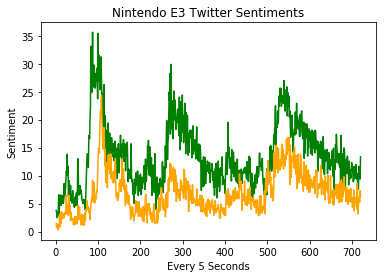

In [102]:
plt.plot(five_sum_df['five_seconds'], five_sum_df['pos'], color='g')
plt.plot(five_sum_df['five_seconds'], five_sum_df['neg'], color='orange')
plt.xlabel('Every 5 Seconds')
plt.ylabel('Sentiment')
plt.title('Nintendo E3 Twitter Sentiments')
plt.show()

#### Trend for mean of 5 seconds

In [95]:
five_mean_df = df.groupby('five_seconds').mean()
five_mean_df = five_mean_df.reset_index()
five_mean_df.head()

five_seconds       index       user.id  compound       neg       neu  \
0             1   44.254545  1.794026e+17  0.070175  0.027091  0.904400   
1             2  149.870968  9.431412e+16  0.099768  0.012613  0.930774   
2             3  247.500000  9.128063e+16  0.048535  0.020833  0.941318   
3             4  338.161290  1.207539e+17  0.021063  0.018855  0.939226   
4             5  433.687500  1.628430e+17  0.081242  0.004563  0.945031   

        pos  
0  0.068509  
1  0.056613  
2  0.037848  
3  0.041919  
4  0.050391

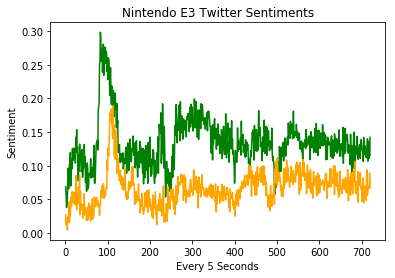

In [101]:
plt.plot(five_mean_df['five_seconds'], five_mean_df['pos'], color='g')
plt.plot(five_mean_df['five_seconds'], five_mean_df['neg'], color='orange')
plt.xlabel('Every 5 Seconds')
plt.ylabel('Sentiment')
plt.title('Nintendo E3 Twitter Sentiments')
plt.show()

### Find Major Announcement Points & the Specific Words that Occured the Most

### Find which words had the biggest impact on the positive/negative sentiments.

In [155]:
df.head()

df_index       user.id                                             .text.  \
0        0  7.823009e+17                        IT BEGINS!! #NintendoDirect   
1        1  3.372678e+08  RT @funkemcfly: lord forgive me but i'm back o...   
2        2  3.187814e+08  The Nintendo presentation is starting!!! My bo...   
3        3  3.632452e+08                          YO HERE WE GO #NintendoE3   
4        4  9.202859e+17             HERE WE GO #NintendoDirect #NintendoE3   

  .lang.                      created_at   timestamp_ms    .time.  \
0     en  Tue Jun 12 16:00:24 +0000 2018  1528819224616  16:00:24   
1     en  Tue Jun 12 16:00:24 +0000 2018  1528819224688  16:00:24   
2     en  Tue Jun 12 16:00:24 +0000 2018  1528819224632  16:00:24   
3     en  Tue Jun 12 16:00:24 +0000 2018  1528819224782  16:00:24   
4     en  Tue Jun 12 16:00:24 +0000 2018  1528819224819  16:00:24   

                                           text2  compound  neg    neu    pos  \
0                                          begin    0.0000  0.0  1.000  0.000   
1  rt lord forgive im back smash 🅱️ros 🅱️ullshit    0.1406  0.0  0.900  0.100   
2         nintendo presentation start body ready    0.5229  0.0  0.748  0.252   
3                                          yo go    0.0000  0.0  1.000  0.000   
4                                             go    0.0000  0.0  1.000  0.000   

   five_seconds  
0             1  
1             1  
2             1  
3             1  
4             1

In [221]:
df.loc[df['five_seconds'] == 81] 

df_index       user.id  \
5580     5580  9.181458e+17   
5581     5581  5.723356e+08   
5582     5582  7.463996e+17   
5583     5583  4.374596e+07   
5584     5584  1.858488e+08   
5585     5585  9.031233e+08   
5586     5586  1.785484e+07   
5587     5587  3.745460e+07   
5588     5588  1.865248e+09   
5589     5589  3.383064e+09   
5590     5590  1.518294e+07   
5591     5591  2.179239e+07   
5592     5592  3.789723e+08   
5593     5593  4.445439e+07   
5594     5594  1.918229e+09   
5595     5595  9.702655e+17   
5596     5596  1.596792e+09   
5597     5597  3.062500e+08   
5598     5598  1.534889e+07   
5599     5599  8.703907e+17   
5600     5600  2.012074e+07   
5601     5601  3.878887e+08   
5602     5602  8.827096e+17   
5603     5603  8.295706e+17   
5604     5604  9.399477e+17   
5605     5605  2.255750e+07   
5606     5606  1.756033e+07   
5607     5607  1.392560e+08   
5608     5608  5.749604e+07   
5609     5609  9.981488e+07   
...       ...           ...   
5630     5630  3.989411e+08   
5631     5631  1.232308e+09   
5632     5632  2.196148e+08   
5633     5633  9.744959e+08   
5634     5634  2.797570e+09   
5635     5635  5.903449e+07   
5636     5636  1.716708e+09   
5637     5637  3.385503e+09   
5638     5638  7.557921e+07   
5639     5639  3.974764e+08   
5640     5640  3.094770e+07   
5641     5641  1.236657e+08   
5642     5642  8.407290e+08   
5643     5643  1.198691e+08   
5644     5644  5.230725e+08   
5645     5645  1.732285e+07   
5646     5646  1.049124e+09   
5647     5647  1.536520e+09   
5648     5648  4.793893e+08   
5649     5649  3.060154e+07   
5650     5650  5.820668e+08   
5651     5651  3.268315e+09   
5652     5652  4.990602e+08   
5653     5653  7.716553e+17   
5654     5654  1.647523e+08   
5655     5655  1.979656e+09   
5656     5656  1.762767e+08   
5657     5657  5.825826e+08   
5658     5658  2.453941e+09   
5659     5659  7.163922e+17   

                                                 .text. .lang.  \
5580  SUPER MARIO PARTY FUCK YES\n\n#E32018 #NintendoE3     en   
5581  RT @TomHall: This Castle was entirely 3D Print...     en   
5582  Mew comes with the Poke ball plus\n#E32018 #Ni...     en   
5583  And Super Mario Party is a thing! #NintendoDir...     en   
5584               New Mario Party! #NintendoE3 #E32018     en   
5585        SUpEr MARIO PARTY. THERE WE GO. #NintendoE3     en   
5586  Mario Partyyyyyyyyyyy. Took long enough. #Nint...     en   
5587  Yeah I'm all about Pokémon on the Switch! Not ...     en   
5588  Wow this looks interesting #NintendoDirect #E3...     en   
5589            MARIO PARTY BABYYYY #NintendoE3 #E32018     en   
5590  RT @OrangeRight: Clearly, that Pokeball came f...     en   
5591  Super Mario Party. Not gonna lie, I smiled jus...     en   
5592  i made fun of the pokeball plus but now i need...     en   
5593         Mario Party yes thank you good #NintendoE3     en   
5594                  #NintendoDirect hey look, trash !     en   
5595  Ohhhhh a new Super Mario Party, that's really ...     en   
5596   mario party switch o hmgggg okay #NintendoDirect     en   
5597  Pokemon laying down the sales guantlet EARLY #...     en   
5598  SUPER MARIO PARTY\n\nI AM SO READY TO HAVE NO ...     en   
5599                #NintendoE3 thats it for pokemon...     en   
5600  @e3 LIVE in case you can’t make the con!!!! Se...     en   
5601  Mario Party on the go. That's pretty cool. #E3...     en   
5602      I KNEW PARTY WASNT FAR BEHIND #NintendoE3 #e3     en   
5603  RT @Elayas_Rock: Glass Ground -New Songs Comin...     en   
5604                                Reggie. #NintendoE3     en   
5605  Daemon x Machina is probably the closest we’re...     en   
5606  Mario Party for the Switch!!!! #NintendoE3 #E3...     en   
5607                     THIS LOOKS SO COOL #nintendoe3     en   
5608     Oh cool a new Mario Party! #NintendoDirect #E3     en   
5609  A $50 peripheral that only works with two titl...     en   
...                                 

In [235]:
mario_party = list(range(81,101))     #81 to 100
smash_brothers = list(range(210,517)) #210 to 516
end = list(range(517, 601))           #517 to 600
#none for all others

df['five_seconds'].max()

720

In [242]:
all_five_seconds = list(range(1, 721))

In [243]:
labels = []
for i in all_five_seconds:
    if i in mario_party:
        labels.append('mario_party')
    elif i in smash_brothers:
        labels.append('smash_brothers')
    elif i in end:
        labels.append('end')
    else:
        labels.append('none')
len(labels)

720

#### Create dictionary of labels and add to dataframe

In [245]:
labels_dict = dict(zip(all_five_seconds, labels))

In [247]:
df['announcements'] = df['five_seconds'].map(labels_dict)
df.loc[df['five_seconds'] == 81] 

df_index       user.id  \
5580     5580  9.181458e+17   
5581     5581  5.723356e+08   
5582     5582  7.463996e+17   
5583     5583  4.374596e+07   
5584     5584  1.858488e+08   
5585     5585  9.031233e+08   
5586     5586  1.785484e+07   
5587     5587  3.745460e+07   
5588     5588  1.865248e+09   
5589     5589  3.383064e+09   
5590     5590  1.518294e+07   
5591     5591  2.179239e+07   
5592     5592  3.789723e+08   
5593     5593  4.445439e+07   
5594     5594  1.918229e+09   
5595     5595  9.702655e+17   
5596     5596  1.596792e+09   
5597     5597  3.062500e+08   
5598     5598  1.534889e+07   
5599     5599  8.703907e+17   
5600     5600  2.012074e+07   
5601     5601  3.878887e+08   
5602     5602  8.827096e+17   
5603     5603  8.295706e+17   
5604     5604  9.399477e+17   
5605     5605  2.255750e+07   
5606     5606  1.756033e+07   
5607     5607  1.392560e+08   
5608     5608  5.749604e+07   
5609     5609  9.981488e+07   
...       ...           ...   
5630     5630  3.989411e+08   
5631     5631  1.232308e+09   
5632     5632  2.196148e+08   
5633     5633  9.744959e+08   
5634     5634  2.797570e+09   
5635     5635  5.903449e+07   
5636     5636  1.716708e+09   
5637     5637  3.385503e+09   
5638     5638  7.557921e+07   
5639     5639  3.974764e+08   
5640     5640  3.094770e+07   
5641     5641  1.236657e+08   
5642     5642  8.407290e+08   
5643     5643  1.198691e+08   
5644     5644  5.230725e+08   
5645     5645  1.732285e+07   
5646     5646  1.049124e+09   
5647     5647  1.536520e+09   
5648     5648  4.793893e+08   
5649     5649  3.060154e+07   
5650     5650  5.820668e+08   
5651     5651  3.268315e+09   
5652     5652  4.990602e+08   
5653     5653  7.716553e+17   
5654     5654  1.647523e+08   
5655     5655  1.979656e+09   
5656     5656  1.762767e+08   
5657     5657  5.825826e+08   
5658     5658  2.453941e+09   
5659     5659  7.163922e+17   

                                                 .text. .lang.  \
5580  SUPER MARIO PARTY FUCK YES\n\n#E32018 #NintendoE3     en   
5581  RT @TomHall: This Castle was entirely 3D Print...     en   
5582  Mew comes with the Poke ball plus\n#E32018 #Ni...     en   
5583  And Super Mario Party is a thing! #NintendoDir...     en   
5584               New Mario Party! #NintendoE3 #E32018     en   
5585        SUpEr MARIO PARTY. THERE WE GO. #NintendoE3     en   
5586  Mario Partyyyyyyyyyyy. Took long enough. #Nint...     en   
5587  Yeah I'm all about Pokémon on the Switch! Not ...     en   
5588  Wow this looks interesting #NintendoDirect #E3...     en   
5589            MARIO PARTY BABYYYY #NintendoE3 #E32018     en   
5590  RT @OrangeRight: Clearly, that Pokeball came f...     en   
5591  Super Mario Party. Not gonna lie, I smiled jus...     en   
5592  i made fun of the pokeball plus but now i need...     en   
5593         Mario Party yes thank you good #NintendoE3     en   
5594                  #NintendoDirect hey look, trash !     en   
5595  Ohhhhh a new Super Mario Party, that's really ...     en   
5596   mario party switch o hmgggg okay #NintendoDirect     en   
5597  Pokemon laying down the sales guantlet EARLY #...     en   
5598  SUPER MARIO PARTY\n\nI AM SO READY TO HAVE NO ...     en   
5599                #NintendoE3 thats it for pokemon...     en   
5600  @e3 LIVE in case you can’t make the con!!!! Se...     en   
5601  Mario Party on the go. That's pretty cool. #E3...     en   
5602      I KNEW PARTY WASNT FAR BEHIND #NintendoE3 #e3     en   
5603  RT @Elayas_Rock: Glass Ground -New Songs Comin...     en   
5604                                Reggie. #NintendoE3     en   
5605  Daemon x Machina is probably the closest we’re...     en   
5606  Mario Party for the Switch!!!! #NintendoE3 #E3...     en   
5607                     THIS LOOKS SO COOL #nintendoe3     en   
5608     Oh cool a new Mario Party! #NintendoDirect #E3     en   
5609  A $50 peripheral that only works with two titl...     en   
...                                 

## Create clustering on the 3 groups (MP, SB, & E)